# Final Project Part 2
In this part, we'll visualize the segmented urban features. Moreover, we'll conduct basic statistical analysis using buffer to see the availability of amenity services in a defined distance of the POIs. First, we'll acquire the required datasets such as csv dataset (generated in section D), points of interests (generated in section B), columbia boundary, selected street network. Then, we'll generate the points of interests along the street, and community park dataset.

# Section A_Plotting Semantic Segmentation Results

Place the 'FinalProjectPt2Data.zip' file into your 'FinalProject' directory.

**********************************************************************************************************************

'FinalProjectPt2Data': This folder contains:

o 'pspnet_final.csv': This is a csv dataset generated in section D. Through PSPNet semantic segmentation, we acquired the percentage of different urban features. The dataset was cleaned and uploaded in the 'FinalProjectPt2Data' folder.

o 'StudyStreet': This is a line feature class originally extracted from MSDIS. The dataset is available in https://data-msdis.opendata.arcgis.com/datasets/mo-modot-roads-routes?geometry=-113.241%2C35.251%2C-71.427%2C41.282. Then, the dataset was simplified and clipped using the StudyBoundary for extracting the necessary part for study.

o 'StudyPoints': This is a point feature class of the study street of Columbia. The dataset was created in the section B.

o 'RecreationalPark': This is a point feature class originally extracted from MSDIS. Then, the dataset was simplified and clipped using the StudyBoundary for extracting the necessary part for study.


**********************************************************************************************************************

## Step 1_Feature classes and csv datasets import

#### Environment Setup

**Import the 'os', 'arcpy', and 'arcpy.env' modules.**

In [1]:
#import os module
import os

#import arcpy module
import arcpy

#import arcpy.env module
from arcpy import env


**Set the base directory location.**

In [2]:
## Configure Base Directory Location.
import sys, os, zipfile, string, math, numpy
import pandas

#get path to the lab
BaseDirectory = os.getcwd()

if not os.path.exists(BaseDirectory):
    print ("File path is invalid")
else:
    print("Input working directory exists!")
    print()
    print(BaseDirectory)

Input working directory exists!

D:\MIZZOU\_GIS_II\Lab\LabFiles\AmanGISNotebooks\FinalProject\FinalFiles


**Unzip 'FinalProjectPt1Data.zip' file placed into your 'FinalProject' directory.**

In [3]:
## Preparing data.
import os, zipfile

datadir = os.path.join(BaseDirectory,'FinalProjectPt2Data.zip')
with zipfile.ZipFile(datadir,'r') as zip_ref:
    zip_ref.extractall(BaseDirectory)    
    if arcpy.Exists('FinalProjectPt2Data'):
        print('Data has been unzipped...no need to run this codeblock again')
    else:
        print('Data has not been unzipped properly')

Data has been unzipped...no need to run this codeblock again


**Set the current workspace environment to your FinalProjectPt2Data folder. Configure the 'overwriteOutput' environmental variable to allow existing datasets to be overwritten. Configure the 'outputCoordinateSystem' to be WGS 1984.**

In [4]:
ProjectDataFolder = os.path.join(BaseDirectory,'FinalProjectPt2Data')

## Set the workspace to your FinalProjectPt2Data folder.
env.workspace = ProjectDataFolder

## Configure to permit overwriting of files.
arcpy.env.overwriteOutput = True

#Verify if project part 2 folder exists
if arcpy.Exists(ProjectDataFolder):
    print('project part 2 directory exists!')
else:
    print('project part 2 directory is incorrectly defined')

#set coordinate system
env.outputCoordinateSystem = arcpy.SpatialReference(4326) #"WGS 1984"
env.outputCoordinateSystem

project part 2 directory exists!


type,Geographic
name,GCS_WGS_1984
factoryCode,4326
datumName,D_WGS_1984
angularUnitName,Degree


**Prepare the features for analysis. First, read features from the data folder. Then convert the feature classes into feature layers**

**Read the feature class 'StudyStreet.shp' and then convert the class to feature layer.**

In [5]:
## Read in a line featureclass stored in shp file format.
StreetPath = os.path.join(env.workspace,'StudyStreet.shp')

## Make a featurelayer so the data can be worked with in memory.
StreetFL = os.path.join(env.workspace,'StudyStreetFL')
arcpy.MakeFeatureLayer_management (StreetPath, StreetFL)

<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\FinalProjectPt2Data\\StudyStreetFL'>

**Read the feature class 'StudyPoints.shp' and then convert the class to feature layer.**

In [6]:
## Read in a point featureclass stored in shp file format.
PointsPath = os.path.join(env.workspace,'StudyPoints.shp')

## Make a featurelayer so the data can be worked with in memory.
PointsFL = os.path.join(env.workspace,'StudyPointsFL')
arcpy.MakeFeatureLayer_management (PointsPath, PointsFL)

<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\FinalProjectPt2Data\\StudyPointsFL'>

**Read the feature class 'RecreationalParks.shp' and then convert the class to feature layer.**

In [7]:
## Read in a point featureclass stored in shp file format.
ParksPath = os.path.join(env.workspace,'RecreationalParks.shp')

## Make a featurelayer so the data can be worked with in memory.
ParksFL = os.path.join(env.workspace,'RecreationalParksFL')
arcpy.MakeFeatureLayer_management (ParksPath, ParksFL)

<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\FinalProjectPt2Data\\RecreationalParksFL'>

**Read the cleaned csv (pspnet_final.csv) data extracted through pspnet deep learning framework**

In [8]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
  
# Import csv data
data = pd.read_csv('FinalProjectPt2Data/pspnet_final.csv')
  
df = pd.DataFrame(data)
df

,FID,building,sky,tree,road,grass,sidewalk,plant,car,streetlight,signboard
0,0,0.191863,0.150297,0.220465,0.007754,0.173000,0.176742,0.032359,0.034359,0.000012,0.000000
1,1,0.199891,0.271680,0.035777,0.318438,0.040871,0.071062,0.019762,0.013020,0.001648,0.001375
2,2,0.155441,0.297082,0.083211,0.198215,0.133445,0.110723,0.005602,0.005605,0.006945,0.001289
3,3,0.105758,0.414398,0.033555,0.308332,0.000000,0.000000,0.000000,0.126074,0.000480,0.001312
4,4,0.128008,0.350633,0.037375,0.351586,0.026840,0.054293,0.000000,0.016715,0.000941,0.014867
...,...,...,...,...,...,...,...,...,...,...,...
476,476,0.019980,0.383211,0.127109,0.394820,0.006918,0.011051,0.000020,0.012469,0.000023,0.000516
477,477,0.060641,0.438336,0.057895,0.373250,0.006074,0.018461,0.005859,0.006234,0.000176,0.000086
478,478,0.064215,0.446746,0.011859,0.373605,0.025012,0.003277,0.013105,0.053043,0.000000,0.000000
479,479,0.116309,0.422062,0.004480,0.380293,0.019492,0.030773,0.000582,0.003797,0.004449,0.004410


## Step 2_Classification Results and Data vizualization

**Read the urban features of the dataset**

In [9]:
#List of the csv dataset
list(df)

['FID',
 'building',
 'sky',
 'tree',
 'road',
 'grass',
 'sidewalk',
 'plant',
 'car',
 'streetlight',
 'signboard']

**Define the urban features and multiply by 100 to get the percentage**

In [10]:
#Set the variables for ID
FID = list(df.iloc[:, 0])

#Set the variables for the urban features and multiply by 100
Building = list(df.iloc[:, 1]*100)
Sky = list(df.iloc[:, 2]*100)
Tree = list(df.iloc[:, 3]*100)
Road = list(df.iloc[:, 4]*100)
Grass = list(df.iloc[:, 5]*100)
Sidewalk = list(df.iloc[:, 6]*100)
Earth = list(df.iloc[:, 7]*100)
Plant = list(df.iloc[:, 8]*100)
Car = list(df.iloc[:, 9]*100)
Streetlight = list(df.iloc[:, 10]*100)

**To plot the combined distribution of different features, at first, you have to define the features in x and y axes. Then, plot the figure and save in the plot in 'OutputFiles' folder**

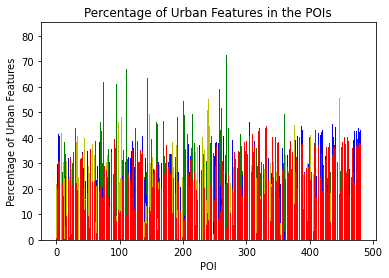

In [11]:
#Define the variables in x and y axes
X = FID
Y1 = Building
Y2 = Sky
Y3 = Tree
Y4 = Road

# Plot the combined data of 4 variables using bar() method
plt.bar(X, Y1, color='g')
plt.bar(X, Y2, color='b')
plt.bar(X, Y3, color='y')
plt.bar(X, Y4, color='r')
plt.title("Percentage of Urban Features in the POIs")
plt.xlabel("POI")
plt.ylabel("Percentage of Urban Features")

#Plot the graph
plt.plot()
#Save the plot in the 'OutputFiles' folder
plt.savefig('OutputFiles/PercentageofUrbanFeatures.png', dpi = 1000)

**To plot the individual distribution of different features in different plots, at first, you have to define the features in x and y axes. Then, plot the figure in subplots, and save in the plot in 'OutputFiles' folder**

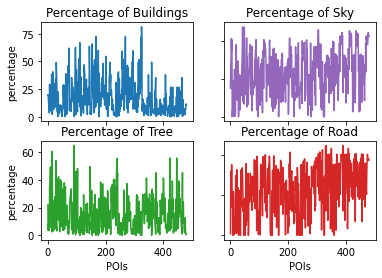

In [12]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(X, Y1)
axs[0, 0].set_title('Percentage of Buildings')
axs[0, 1].plot(X, Y2, 'tab:purple')
axs[0, 1].set_title('Percentage of Sky')
axs[1, 0].plot(X, Y3, 'tab:green')
axs[1, 0].set_title('Percentage of Tree')
axs[1, 1].plot(X, Y4, 'tab:red')
axs[1, 1].set_title('Percentage of Road')

for ax in axs.flat:
    ax.set(Xlabel='POIs', Ylabel='percentage')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.plot()
plt.savefig('OutputFiles/PercentageOfDifferentFeatures.png', dpi = 1000)

#### Output of the diagram generated through python package 'Matplotlib'**

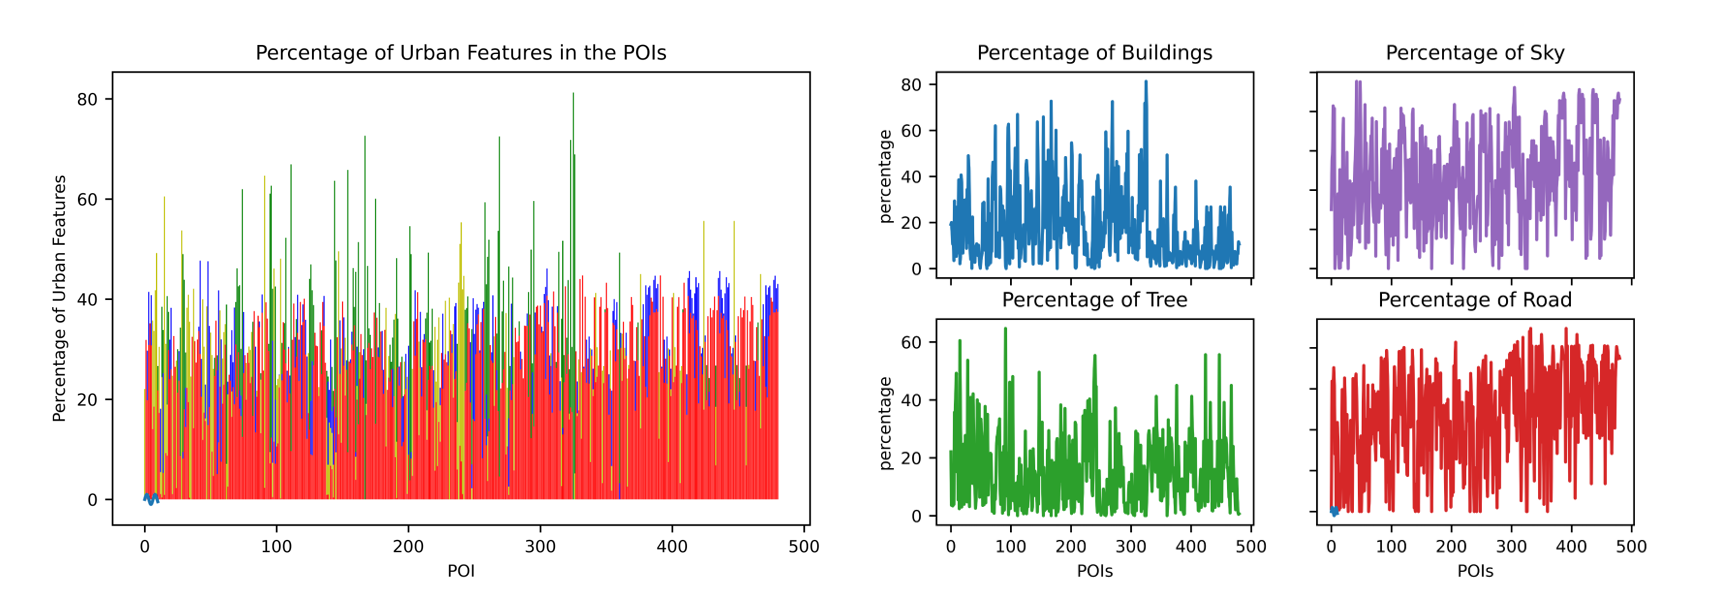

**Output of the data distribution for each POIs generated in excel**


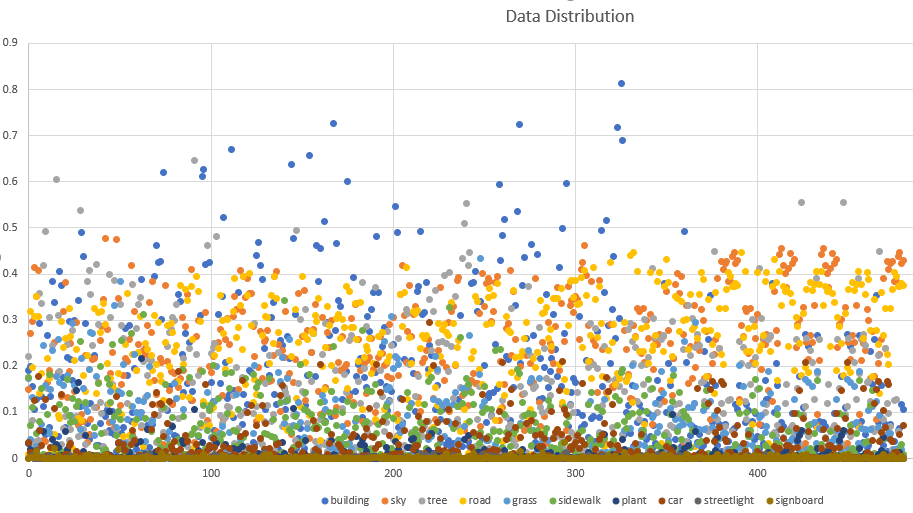

# Section B_Basic Data Analysis Procedure

## Step_GIS Data analysis & Data Visualization

**In this step, we'll calculate the availability of the recreational parks in a certain distance of SVIs. The final output of the analysis is provided below**
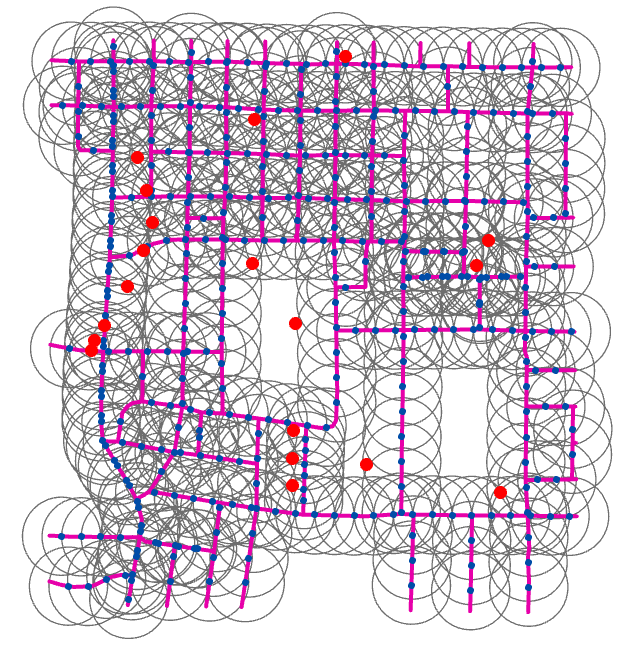

**Calculate the 100 meter Buffer of the SVIs. A new point feature class 'BufferedStudyPoints' was created using 'StudyPoints'**

In [13]:
#Buffer of the 'StudyPoints' feature class
arcpy.analysis.Buffer(in_features = PointsFL, out_feature_class = 'BufferedStudyPoints', buffer_distance_or_field = '100 meters', method = 'GEODESIC')

<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\FinalProjectPt2Data\\BufferedStudyPoints.shp'>

**Read the feature class and convert into feature layer**

In [14]:
## Read in a point featureclass stored in shp file format.
BufferedPointsPath = os.path.join(env.workspace,'BufferedStudyPoints.shp')
## Make a featurelayer so the data can be worked with in memory.
BufferedPointsFL = os.path.join(env.workspace,'BufferedStudyPointsFL')
arcpy.MakeFeatureLayer_management (BufferedPointsPath, BufferedPointsFL)

<Result 'D:\\MIZZOU\\_GIS_II\\Lab\\LabFiles\\AmanGISNotebooks\\FinalProject\\FinalFiles\\FinalProjectPt2Data\\BufferedStudyPointsFL'>

**Create a new GIS basemap in the Jupyter notebook.**

In [15]:
#Import the package
import pandas as pd
import arcgis
from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

#create online gis display
myGIS = GIS()

#create map widget
#m1 = myGIS.map('Missouri')

m1 = myGIS.map('Lowry St, Columbia, Missouri')
m1.zoom = 14
#m1.center = [38.9517,-92.3341] #38.9517° N, 92.3341° W 38.95171 -92.33407

#display map
m1

MapView(layout=Layout(height='400px', width='100%'))

##### Please Run the below code blocks again, if needed

In [20]:
#Run this block again if this codeblock doesnot work while clicking 'Run All'

## Read in a polygon featureclass stored in shp file format.
BufferedPointsFC = os.path.join(env.workspace,'BufferedStudyPoints.shp')

## Create a spatialdataframe to plot
BufferedPointsFCSDF = pd.DataFrame.spatial.from_featureclass(BufferedPointsFC)
print('Created a spatially enabled dataframe')


#create a customized visualization of your data layer
BufferedPointsFCSDF.spatial.plot(map_widget=m1,renderer_type='s',symbol_type='simple',cmap=[255,0,100,1],alpha=1,cstep=1,outline_color='Reds_r',marker_size=.5)

Created a spatially enabled dataframe


True

In [22]:
#Run this block again if this codeblock doesnot work while clicking 'Run All'

## Read in a line featureclass stored in shp file format.
StreetPath = os.path.join(env.workspace,'StudyStreet.shp')

#convert featureclass to spatial dataframe
StreetSDF = pd.DataFrame.spatial.from_featureclass(StreetPath)

#create a customized visualization of your data layer
StreetSDF.spatial.plot(map_widget=m1, renderer_type='s',symbol_type='simple',cmap='Greys_r',alpha=1,cstep=1,outline_color='Reds',marker_size=.25)


True

In [23]:
#Run this block again if this codeblock doesnot work while clicking 'Run All'

## Read in a point featureclass stored in shp file format.
PointsPath = os.path.join(env.workspace,'StudyPoints.shp')

#convert featureclass to spatial dataframe
PointsSDF = pd.DataFrame.spatial.from_featureclass(PointsPath)

## Task 12:  Develop your code for Task 12 here (Run this block again if it dowsnot work while clicking 'Run All')

#create a customized visualization of your data layer
PointsSDF.spatial.plot(map_widget=m1,renderer_type='s',symbol_type='simple',symbol_style='o', colors='Blues_r', outline_color='Blues_r',
                      col='Points',cstep=50,marker_size=3,alpha=1,line_width=0.1)


True

In [19]:
#Run this block again if this codeblock doesnot work while clicking 'Run All'

## Read in a point featureclass stored in shp file format.
ParksPath = os.path.join(env.workspace,'RecreationalParks.shp')

#convert featureclass to spatial dataframe
ParksSDF = pd.DataFrame.spatial.from_featureclass(ParksPath)

#create a customized visualization of your data layer
ParksSDF.spatial.plot(map_widget=m1,renderer_type='s',symbol_type='simple',symbol_style='o', colors='Greens_r', outline_color='Greens_r',
                      col='Points',cstep=50,marker_size=6,alpha=1,line_width=0.1)

True

# Limitations of this project workflow

- Due to time constraint, there are several redundancies in the codings. In future, I'll revise the codes in several blocks to reduce the redundancies.

- Google API needs one more parameter: angle (angle of the POIs along the street) information which provides more accuracy in extracting the SVIs. Through ArcGISpro, it was possible to extract lat long information of the points, however, unlike QGIS, ArcGIS pro doesn't provide the angle information while executing the geoprocessing tools. I have to explore more, how to acquire that information from ArcGIS pro.

- More statistical analyses are needed to reach the research results. Due to time constriant and project scope, I explored only with segmentation results and distribution; and buffer of the SVIs to see the availability of the parks. Future works include more feature classes such as amenity services, restaurants; and statistical analyses such as summarize within, hotspot analysis/Thessellation (Poisson Distribution) etc. to acquire more specific results.

# SAVE YOUR NOTEBOOK, then `File > Close and Halt`

Template copyright_ Dr. Matisziw 2019